In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read dataset
df = pd.read_csv('/content/insurance.csv')

In [3]:
#Display rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Statistical analysis of numerical features
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Statistical analyis of Categorical features
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [8]:
#check how children column dsidtributed
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [9]:
#Check for missing values
df.isna().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


No missing values

Exploratory data analysis

In [10]:

numerical_col = ['age','bmi','children','charges']
cat_col = ['sex','smoker','region']


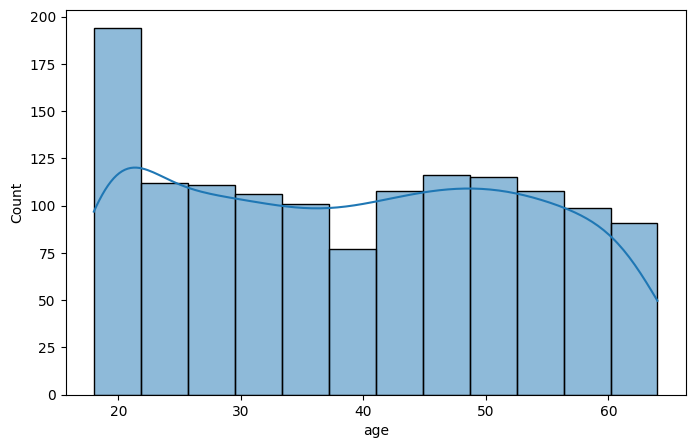

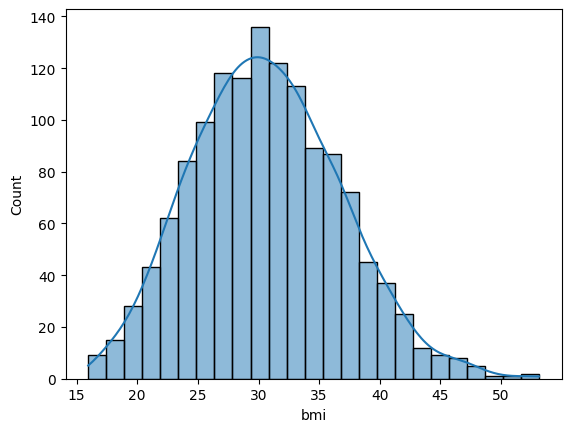

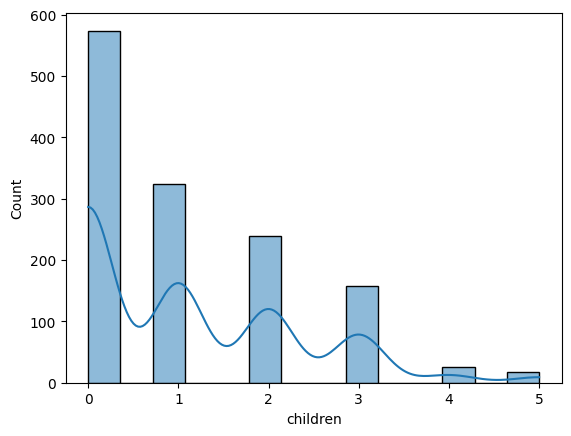

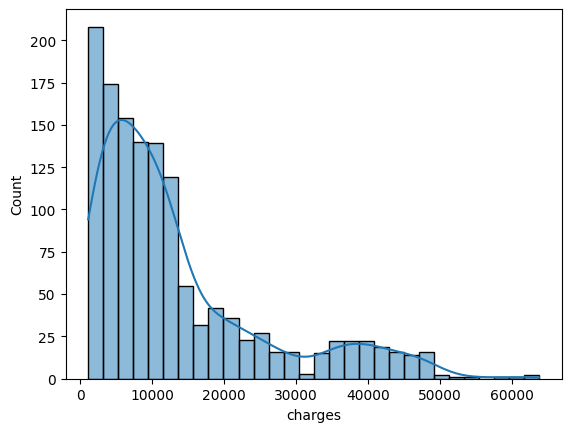

In [11]:
# Distribution of numerical columns

plt.figure(figsize=(8,5))
for col in numerical_col:
  sns.histplot(df[col],kde=True)
  plt.show()

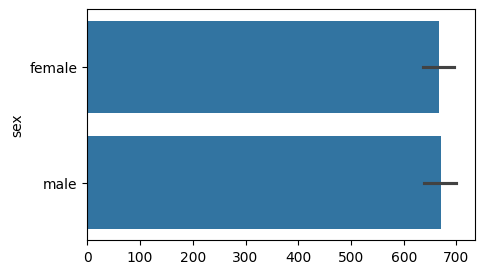

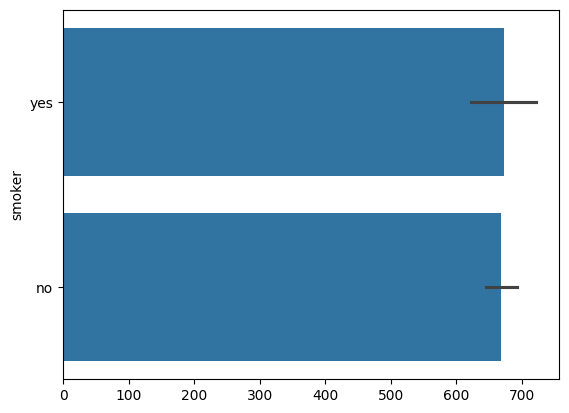

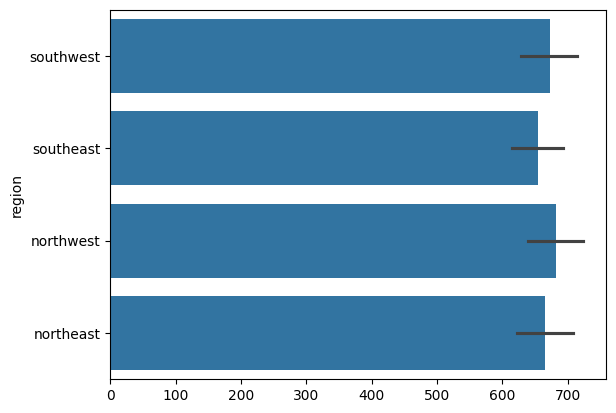

In [12]:
# Check distribution of categorical variables

plt.figure(figsize=(5,3))
for col in cat_col:
  sns.barplot(df[col])
  plt.show()

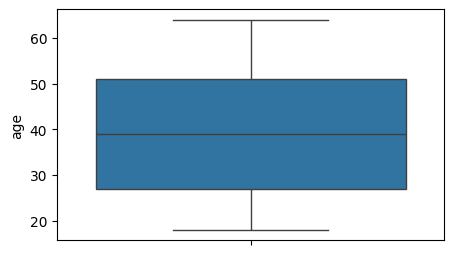

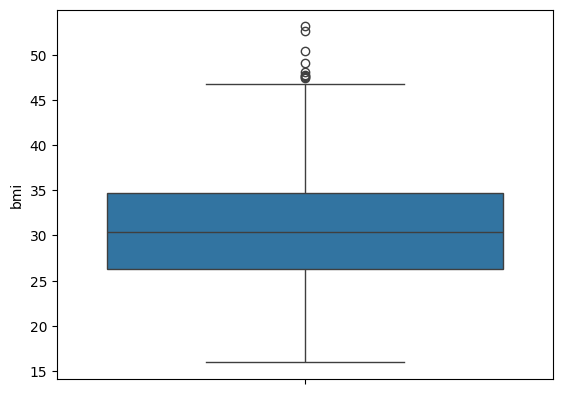

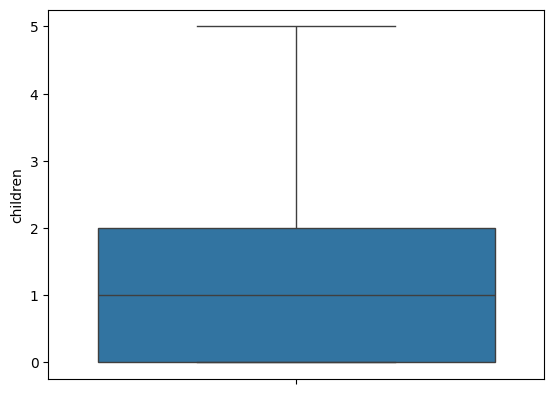

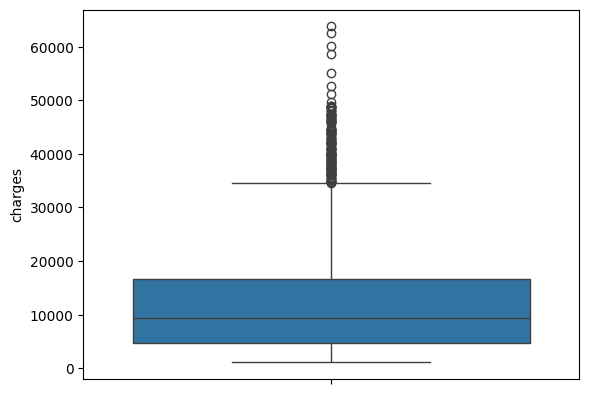

In [13]:
#Boxplot to check outliers in Numerical columns

plt.figure(figsize=(5,3))
for col in numerical_col:
  sns.boxplot(df[col])
  plt.show()

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


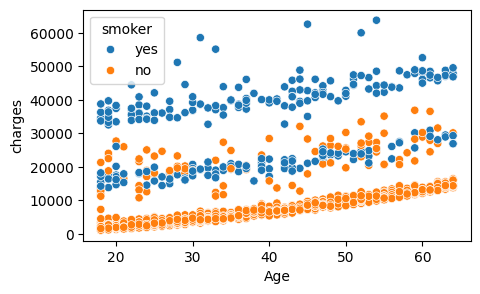

In [15]:
# Identify relationships between features and the target variable (charges)

plt.figure(figsize=(5,3))
sns.scatterplot(x='age',y='charges', data=df, hue='smoker')
plt.xlabel('Age')
plt.ylabel('charges')
plt.show()

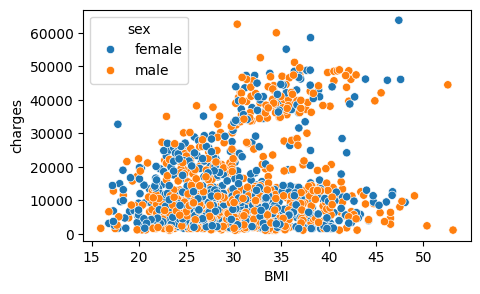

In [16]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='bmi',y='charges', data=df, hue='sex')
plt.xlabel('BMI')
plt.ylabel('charges')
plt.show()

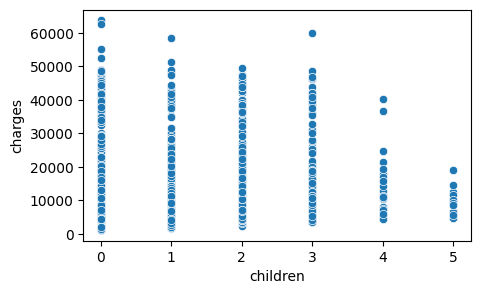

In [17]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='children',y='charges', data=df,)
plt.xlabel('children')
plt.ylabel('charges')
plt.show()

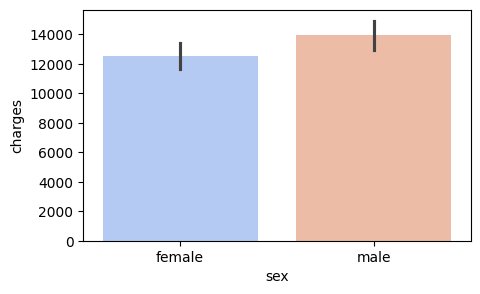

In [18]:
#Barplot for categorical feature and target feature

plt.figure(figsize=(5,3))
sns.barplot(x='sex',y='charges',data=df, palette='coolwarm')
plt.xlabel('sex')
plt.ylabel('charges')
plt.show()

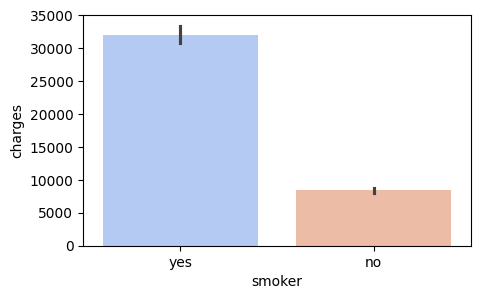

In [19]:
plt.figure(figsize=(5,3))
sns.barplot(x='smoker',y='charges',data=df, palette='coolwarm')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.show()

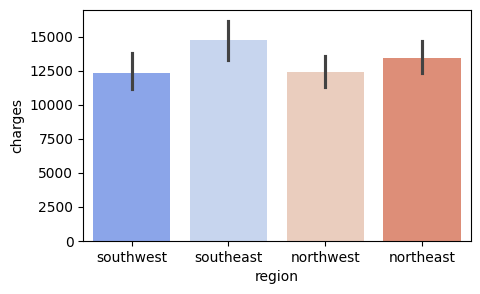

In [20]:
plt.figure(figsize=(5,3))
sns.barplot(x='region',y='charges',data=df, palette='coolwarm')
plt.xlabel('region')
plt.ylabel('charges')
plt.show()

<Figure size 500x300 with 0 Axes>

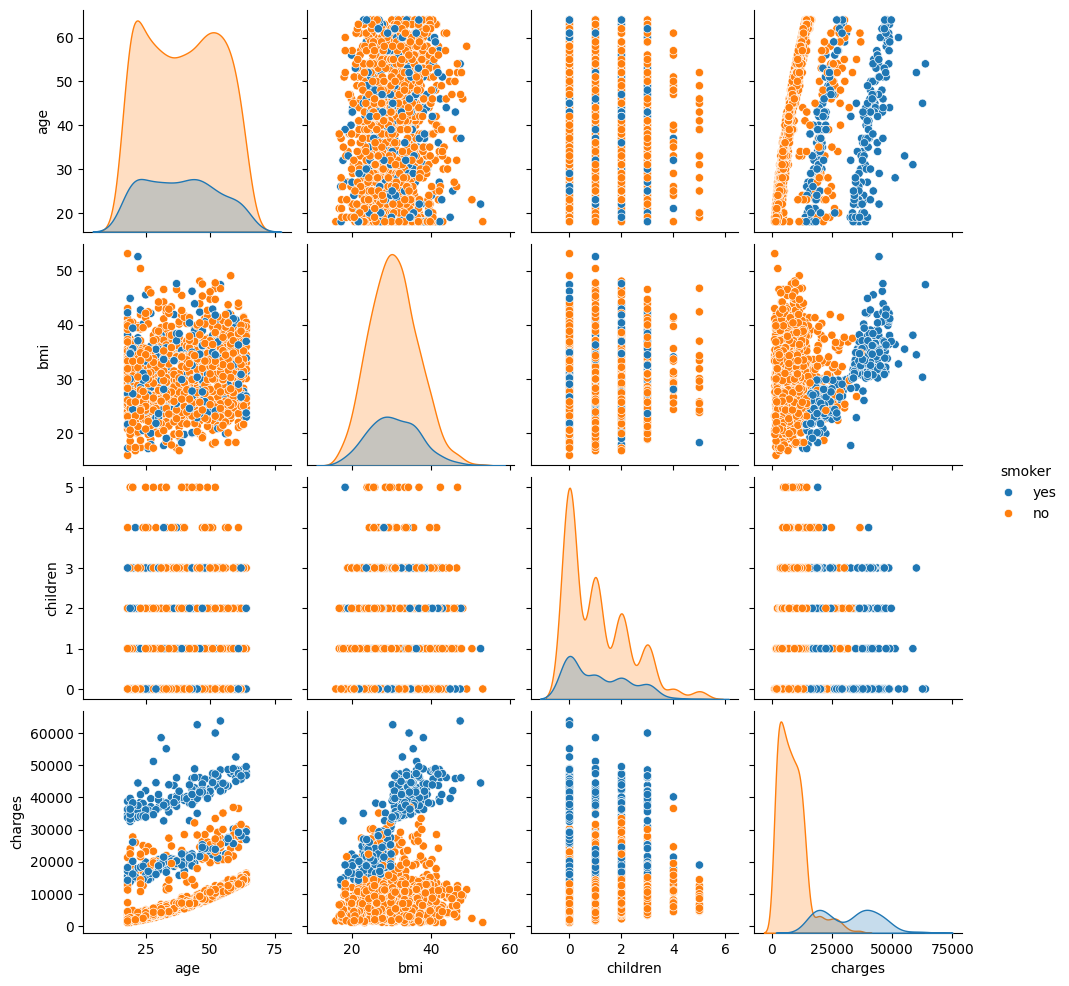

In [21]:
# Multivariate analysis

plt.figure(figsize=(5,3))
sns.pairplot(df, hue='smoker')
plt.show()

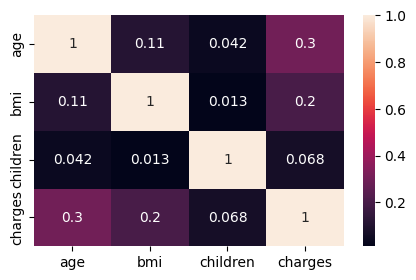

In [22]:
# correlation analyisis

plt.figure(figsize=(5,3))
num_df = df.select_dtypes(include=['number'])
sns.heatmap(num_df.corr(), annot=True)
plt.show()

**Insights**

1.Smokers incur significantly higher charges, especially as age increases.
2.There's a strong positive correlation between age and charges for smokers.
3.Higher BMI slightly associates with higher charges, especially in the obese range (>30)
4.Charges appear widely spread regardless of the number of children, no clear correlation
5.Average charges for males and females are almost the same.
6.Smokers pay drastically more in medical charges than non-smokers
7.Southeast region has slightly higher average charges, but not very significant.











**Data Preprocessing**

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#No missing values

In [24]:
#Encode categorical variables (onehot encoding)

df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], dtype = int)
df_encoded.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [25]:
#Handle outliers
df_encoded['log_charges'] = np.log(df_encoded['charges'])

In [27]:
# Separate features and target
X = df_encoded.drop(['charges','children'], axis=1)
y = df_encoded['charges']

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,age,bmi,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,log_charges
0,-1.438764,-0.453320,1.010519,-1.010519,-1.970587,1.970587,-0.565267,-0.566418,-0.611324,1.765481,0.691394
1,-1.509965,0.509621,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418,-1.790020
2,-0.797954,0.383307,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418,-0.759500
3,-0.441948,-1.305531,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418,0.978513
4,-0.513149,-0.292556,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418,-0.912181


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [30]:
lr_model_log = LinearRegression()
lr_model_log.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lr_model_log.predict(X_test)

In [34]:
r2_log = r2_score(y_test, y_pred)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2_log:.4f}")
print(f"RMSE: {rmse_log:.2f}")

R² Score: 0.8926
RMSE: 4082.68


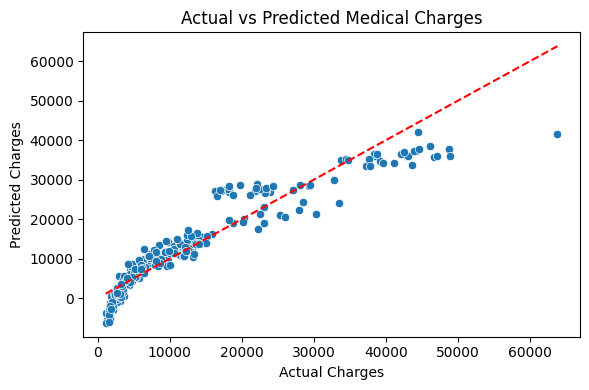

In [35]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.tight_layout()
plt.show()